In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
df = pd.read_csv('Calls Data weekly.csv')
#Printing head
print(df.head())
print(df.tail())
print(df.shape)

         date   Calls
0  2017-06-05  156765
1  2017-06-12  132625
2  2017-06-19  122338
3  2017-06-26  121952
4  2017-07-03  148708
           date   Calls
118  2019-09-02  118753
119  2019-09-09  166199
120  2019-09-16  154386
121  2019-09-23  130366
122  2019-09-30  120030
(123, 2)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
date     123 non-null object
Calls    123 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [4]:
#Checking for duplicates in date column
df[df.date.duplicated()]

date   Calls
84  2019-01-07  124460

In [5]:
#As there is same date(2019-01-07) at index 83 and 84 the calls value was added and made it into a single row of date 2019-01-07
print('Before Handling of duplicate calls:')
print(df.loc[83])
print(df.loc[84])

df.loc[83,'Calls'] = df.loc[83,'Calls'] + df.loc[84, 'Calls']

print('After Handling of duplicate calls:')
print(df.loc[83])
print(df.loc[84])

Before Handling of duplicate calls:
date     2019-01-07
Calls         40224
Name: 83, dtype: object
date     2019-01-07
Calls        124460
Name: 84, dtype: object
After Handling of duplicate calls:
date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-07
Calls        124460
Name: 84, dtype: object


In [6]:
df.drop([84], inplace=True)

In [7]:
print(df.loc[83])
print(df.loc[85])

print(df[df.date.duplicated()])

df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

print(df)
print(df.loc[83])
print(df.loc[84])

date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-14
Calls        181634
Name: 85, dtype: object
Empty DataFrame
Columns: [date, Calls]
Index: []
           date   Calls
0    2017-06-05  156765
1    2017-06-12  132625
2    2017-06-19  122338
3    2017-06-26  121952
4    2017-07-03  148708
..          ...     ...
117  2019-09-02  118753
118  2019-09-09  166199
119  2019-09-16  154386
120  2019-09-23  130366
121  2019-09-30  120030

[122 rows x 2 columns]
date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-14
Calls        181634
Name: 84, dtype: object


In [8]:
#Converting date column into datetime format
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2017-06-05 to 2019-09-30
Data columns (total 1 columns):
Calls    122 non-null int64
dtypes: int64(1)
memory usage: 1.9 KB


In [9]:
df

Calls
date              
2017-06-05  156765
2017-06-12  132625
2017-06-19  122338
2017-06-26  121952
2017-07-03  148708
...            ...
2019-09-02  118753
2019-09-09  166199
2019-09-16  154386
2019-09-23  130366
2019-09-30  120030

[122 rows x 1 columns]

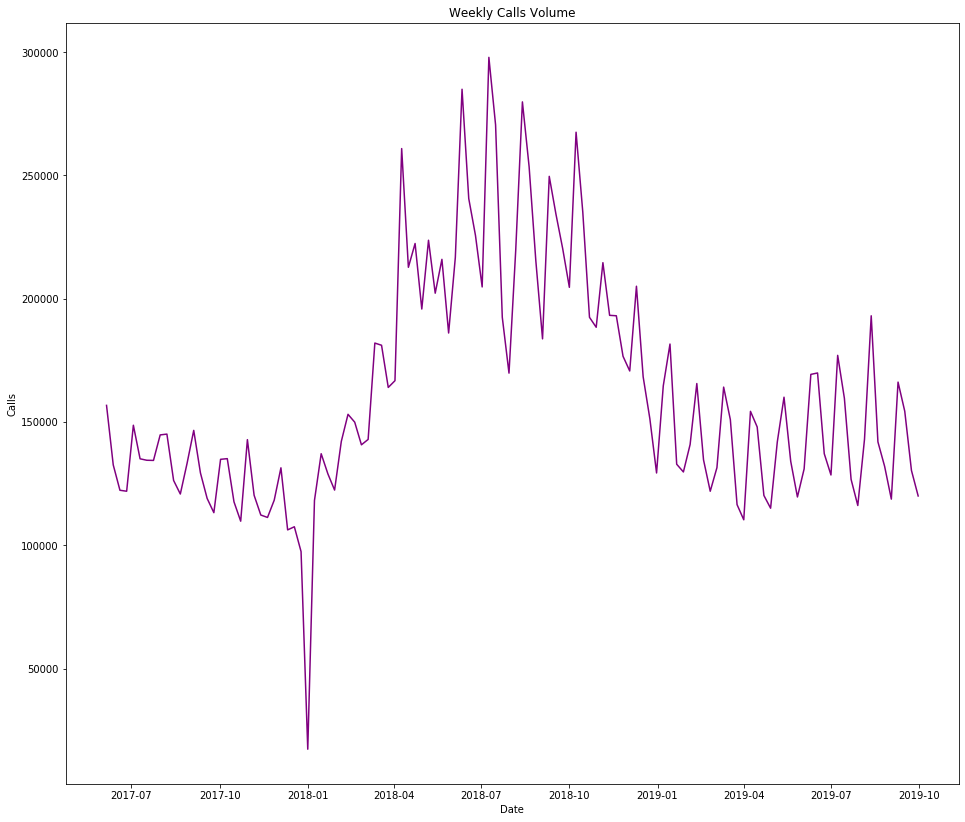

<Figure size 432x288 with 0 Axes>

In [10]:
#Plotting the time series graph
fig, ax = plt.subplots(figsize=(16, 14))

# Add the x-axis and the y-axis to the plot
ax.plot(df.index.values,
        df['Calls'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Calls",
       title="Weekly Calls Volume")

plt.show()
plt.savefig('time-series.png')

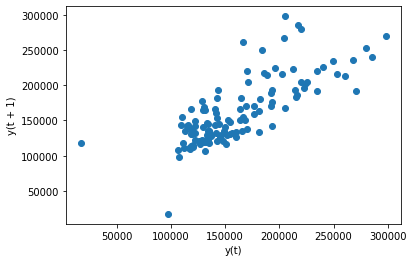

In [11]:
#Quick check for auto-correlation
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

As we can see, a large number of obervations along the diagonal line of plot which clearly indicates some sort of relationship/correlation

In [12]:
#Calculating correlation between observation and lagged variable
values = pd.DataFrame(df.values)
data = pd.concat([values.shift(1), values], axis=1)
data.columns = ['t-1', 't+1']
result = data.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.773443
t+1  0.773443  1.000000


It shows a strong positive correlation(0.77) between the observed variable and lag = 1 value.

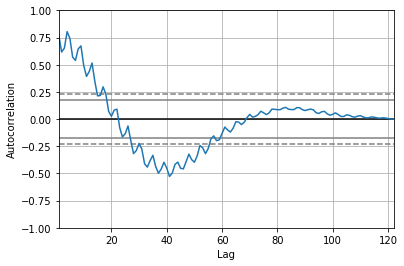

In [13]:
#Plot of correlation coefficients for each lag variable
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

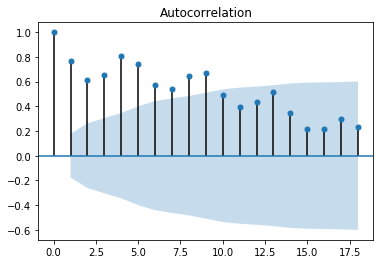

In [14]:
#Statsmodels autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=18)
plt.show()

Lag: 12
Coefficients: [ 1.79790816e+04  4.72658605e-01 -6.85197269e-03  6.51203104e-02
  4.40562111e-01  5.48376237e-02 -4.67170701e-02  3.18149515e-02
  6.03080632e-02  2.10280758e-01 -2.31713352e-01 -6.87923513e-02
 -8.82715148e-02]
predicted=161442.338441, expected=141962.000000
predicted=123384.834833, expected=132027.000000
predicted=139821.780881, expected=118753.000000
predicted=166608.885371, expected=166199.000000
predicted=153708.684623, expected=154386.000000
predicted=132165.065425, expected=130366.000000
predicted=125501.186140, expected=120030.000000
Test MSE: 133123058.383


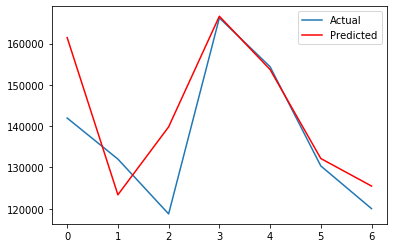

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test, label = 'Actual')
plt.plot(predictions, color='red', label = 'Predicted')
plt.legend(loc='best')
plt.show()

In [16]:
from sklearn.metrics import r2_score
#R-squared 
r2 = r2_score(df['Calls'].tail(7), predictions)

In [17]:
r2

0.5006005319793503

In [18]:
#Making the time series stationary by differencing
df_new = df.copy()
df_new['stationary']=df_new['Calls'].diff()

In [20]:
x = df_new['stationary'].dropna()
x.isnull().sum()

0

D:\Anaconda\envs\data3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


The lag value chosen is: 12
The coefficients of the model are:
 const             564.025878
L1.stationary      -0.489216
L2.stationary      -0.476333
L3.stationary      -0.384090
L4.stationary       0.065786
L5.stationary       0.104055
L6.stationary       0.059419
L7.stationary       0.087145
L8.stationary       0.119668
L9.stationary       0.302851
L10.stationary      0.077165
L11.stationary      0.017803
L12.stationary     -0.070319
dtype: float64


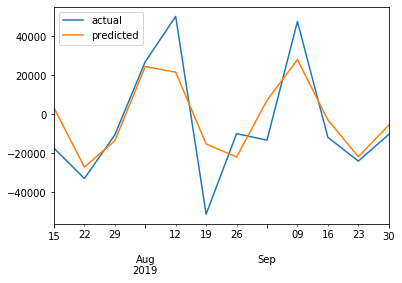

In [21]:
#Forecasting on the stationary dataset
train_data = x[1:len(x)-12]
test_data = x[x[len(x)-12:]]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

print('The lag value chosen is: %s' % model_fitted.k_ar)
 
print('The coefficients of the model are:\n %s' % model_fitted.params)
 

# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [df_new['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot()


In [28]:
error_new = mean_squared_error(x.tail(12), predictions)
print('Test MSE: %.3f' % error_new)

Test MSE: 302201176.475


In [29]:
r2_new = r2_score(df_new['stationary'].tail(12), predictions)
r2_new

0.6518785688447184

In [30]:
predictions

2019-07-15     3270.406431
2019-07-22   -27019.863801
2019-07-29   -13597.084320
2019-08-05    24412.245015
2019-08-12    21495.752188
2019-08-19   -15233.074467
2019-08-26   -21906.994908
2019-09-02     7135.048309
2019-09-09    27944.506145
2019-09-16    -2941.906337
2019-09-23   -21757.811248
2019-09-30    -5599.863572
Freq: W-MON, dtype: float64